<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_09/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [7]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




EDA

In [3]:
for columna in df:
  df[columna].fillna(df[columna].mean(), inplace=True)
df.drop(columns = ["id", "diagnosis"]).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

En columna diagnosis vemos 2 tipos de datos bastante equilibrados y obviamente sin outliers por lo que con kmeans y esta informacion podemos acercarnos bastante a predecir el diagnostico segun el resto de datos del paciente

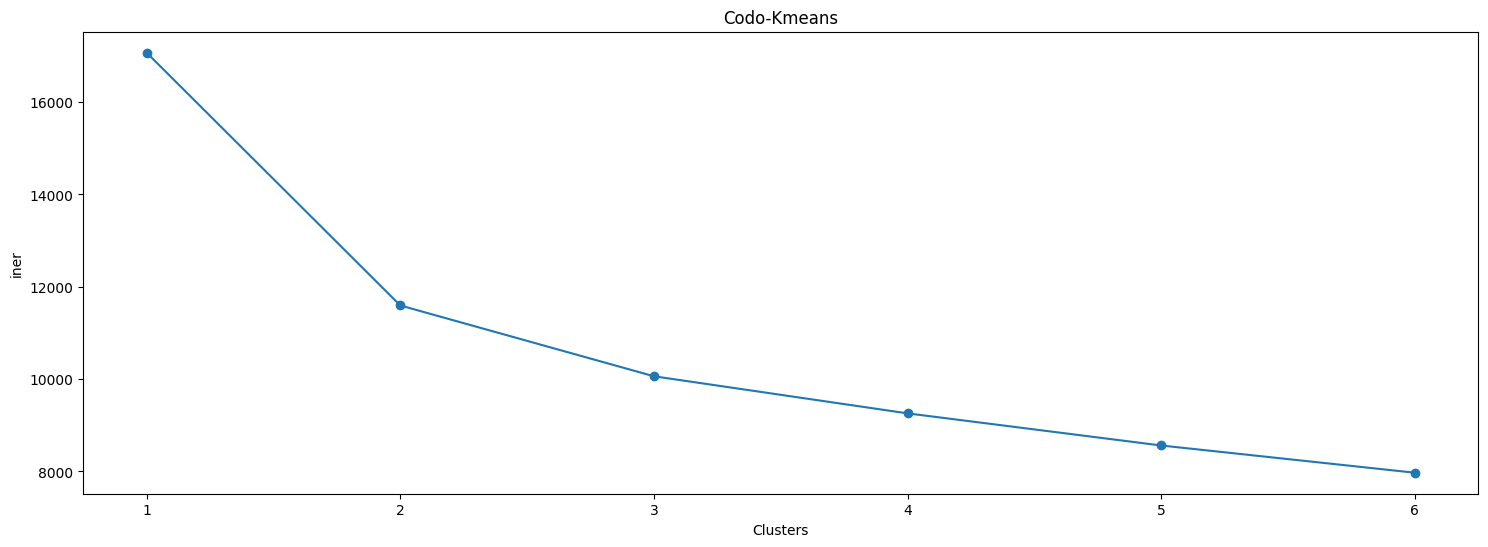

In [68]:
from sklearn.cluster import KMeans
df_km = df
indices = [1, 100, 500]
muestra = pd.DataFrame(df_km.loc[indices], columns=df_km.keys()).reset_index(drop=True)
df_km = df_km.drop(columns = ["id", "diagnosis"])            
muestra = muestra.drop(columns = ["id", "diagnosis"])  
                                                       

df_km = StandardScaler().fit_transform(df_km)

iner = []
for i in range(1,7):
  alg=KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10)
  alg.fit(df_km)
  iner.append(alg.inertia_)

plt.figure(figsize=(18,6))
plt.title("Codo-Kmeans")
plt.xlabel("Clusters")
plt.ylabel("iner")
plt.plot(list(range(1,7)), iner, marker="o")
plt.show()

La metrica tiene su cambio abrupto a partir de 2 clusters, asi nos quedamos con esa cantidad

In [69]:
alg=KMeans(n_clusters = 2, init = "k-means++", max_iter = 100, n_init = 7)
alg.fit(df_km)
centros = alg.cluster_centers_
asignacion = alg.labels_
df_km_f = pd.concat([pd.DataFrame(data=asignacion), df], axis=1, sort=False).rename(columns={0 : 'Cluster'})
df_km_f.head()

,Cluster,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


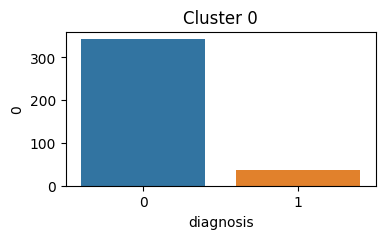

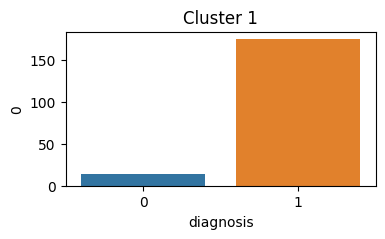

In [70]:
for c in range(0,2):
  df_aux = df_km_f[df_km_f['Cluster']==c].groupby('diagnosis').apply(lambda x: len(x)).reset_index()
  plt.figure(figsize=(4,2))
  sns.barplot(
    x="diagnosis",
    y=0,
    data=df_aux 
)
  plt.title("Cluster "+str(c))
  plt.show()

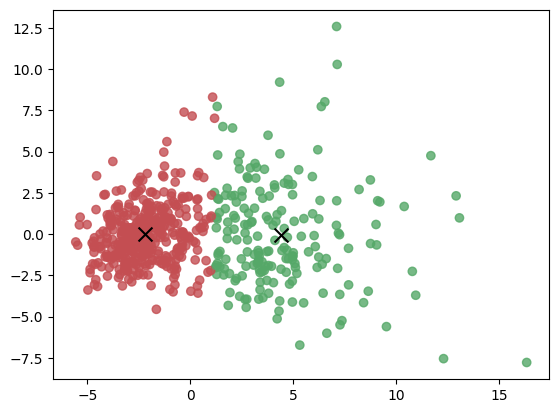

In [71]:
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(df_km)
pca = modelo_pca.transform(df_km)
centroides_pca = modelo_pca.transform(centros)

colores_cluster = [["r", "g"][asignacion[i]] for i in range(len(pca))]
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, alpha = 0.8)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker = "x", s = 100, c = "black")

plt.show()

Ahora usando randomforest

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()
forest.get_params()
pXp = {"criterion" : ("gini", "entropy"), 
              "n_estimators" : (10, 20, 30),
              "max_samples" : (1/3, 2/3)}
d={}
métricas = ["accuracy", "recall", "precision"]
d["métricas"] = métricas
for e, _ in pXp.items():
  d[e] = []
d["bs"] = []

for métrica in métricas:
  grid = GridSearchCV(forest, pXp, scoring = métrica)
  grid.fit(df.drop(columns = ["diagnosis", "id"]).values, df["diagnosis"].values)
  for llave, _ in pXp.items():
    d[llave].append(grid.best_params_[llave])
  d["bs"].append(grid.best_score_)

sumary_metricas = pd.DataFrame(d)
sumary_metricas 

,métricas,criterion,n_estimators,max_samples,bs
0,accuracy,entropy,20,0.666667,0.964835
1,recall,gini,30,0.333333,0.934330
2,precision,entropy,30,0.666667,0.967093


Y finalmente con regresion logistica

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df["diagnosis"]
x = df.drop(columns = ["id", "diagnosis"])

array_test_size = [0.1, 0.25, 0.5, 0.75, 1]
array_random_state = [3, 9, 27, 81]

max = 0 
ts_min = 0
rs_min = 0
for ts in array_test_size:
  for rs in array_random_state:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state = rs)
    lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    lr_pred = lr.predict(x_test)
    if(accuracy_score(y_test, lr_pred) >= min):
      min =accuracy_score(y_test, lr_pred)
      ts_min = ts
      rs_min = rs
print("Mejores hyperparametros")
print("test_size = "+str(ts_min))
print("random_state = "+str(rs_min))
print("accuracy: "+str(min))

Mejores hyperparametros
test_size = 1
random_state = 81
accuracy: 1.0
